In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df=pd.read_excel('covid.xlsx')

In [142]:
df.head()

,Sno,age,gender,body temperature,Dry Cough,sour throat,weakness,breathing problem,drowsiness,pain in chest,...,diabetes,heart disease,lung disease,stroke or reduced immunity,symptoms progressed,high blood pressue,kidney disease,change in appetide,Loss of sense of smell,Corona result
0,1,20,1,98.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,19,1,99.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,55,0,102.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
3,4,40,0,100.0,0,0,0,0,1,1,...,1,0,0,0,1,1,0,1,0,2
4,5,33,1,99.2,0,1,0,1,0,0,...,0,0,1,1,1,0,0,0,1,2


In [143]:
df.isnull().sum()

Sno                                     0
age                                     0
gender                                  0
body temperature                        0
Dry Cough                               0
sour throat                             0
weakness                                0
breathing problem                       0
drowsiness                              0
pain in chest                           0
travel history to infected countries    0
diabetes                                0
heart disease                           0
lung disease                            0
stroke or reduced immunity              0
symptoms progressed                     0
high blood pressue                      0
kidney disease                          0
change in appetide                      0
Loss of sense of smell                  0
Corona result                           0
dtype: int64

In [144]:
df.dtypes

Sno                                       int64
age                                       int64
gender                                    int64
body temperature                        float64
Dry Cough                                 int64
sour throat                               int64
weakness                                  int64
breathing problem                         int64
drowsiness                                int64
pain in chest                             int64
travel history to infected countries      int64
diabetes                                  int64
heart disease                             int64
lung disease                              int64
stroke or reduced immunity                int64
symptoms progressed                       int64
high blood pressue                        int64
kidney disease                            int64
change in appetide                        int64
Loss of sense of smell                    int64
Corona result                           

In [145]:
df.shape

(127, 21)

In [146]:
df['breathing problem'].value_counts()

0    72
1    55
Name: breathing problem, dtype: int64

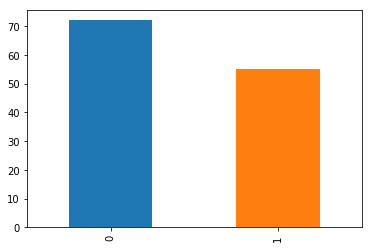

In [147]:
df['breathing problem'].value_counts().plot.bar()

In [307]:
X=df.iloc[:,0:19]
Y=df.iloc[:,20:]

In [308]:
X.shape


(127, 19)

In [369]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=9,shuffle=True,random_state=0)

In [370]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [371]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [372]:
y_pred=classifier.predict(x_test)

In [373]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6923076923076923